In [4]:
import pandas as pd
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

### Parsing and EDA

In [18]:
#reading json file
with open('C:/Users/ander/LightHouseNotes/final-project-tableau/Data/Old data/weekly_earnings.json') as f:
   message = json.load(f)

#selecting the data
message = message['meta']['view']['columns']

date = []
region = []
earnings = []
for i in message:
      for j in i['cachedContents']['top']:
            date.insert(len(date), j['count'])
            region.insert(len(region), i['name'])
            earnings.insert(len(earnings), float(j['item']))
            
#gathering the collected data
table = pd.DataFrame()
table['date'] = date
table['region'] = region
table['earnings'] = earnings
table

,date,region,earnings
0,20,Alberta,1159.89
1,19,Alberta,1163.69
2,18,Alberta,1160.77
3,17,Alberta,1159.60
4,16,Alberta,1158.79
...,...,...,...
83,17,Saskatchewan,991.30
84,16,Saskatchewan,982.60
85,15,Saskatchewan,991.21
86,14,Saskatchewan,988.79


In [19]:
#changing date column to datetime format
date = []
for i in table['date']:
    date.insert(len(date), datetime.strptime(str(i), '%y'))

table['date'] = date
table


,date,region,earnings
0,2020-01-01,Alberta,1159.89
1,2019-01-01,Alberta,1163.69
2,2018-01-01,Alberta,1160.77
3,2017-01-01,Alberta,1159.60
4,2016-01-01,Alberta,1158.79
...,...,...,...
83,2017-01-01,Saskatchewan,991.30
84,2016-01-01,Saskatchewan,982.60
85,2015-01-01,Saskatchewan,991.21
86,2014-01-01,Saskatchewan,988.79


In [20]:
#checking for Null values and columns type
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      88 non-null     datetime64[ns]
 1   region    88 non-null     object        
 2   earnings  88 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.2+ KB


In [21]:
#checking for wrong entries
for i in table.columns:
    print('{}:{}'.format(i,table[i].unique()))

date:['2020-01-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000']
region:['Alberta' 'BritishColumbia' 'Canada' 'Manitoba' 'NewBrunswick'
 'NewfoundlandAndLabrador' 'NovaScotia' 'Ontario' 'PrinceEdwardIsland'
 'Quebec' 'Saskatchewan']
earnings:[1159.89 1163.69 1160.77 1159.6  1158.79 1176.32 1173.23 1150.61  896.29
  901.86  902.69  904.11  911.57  919.2   911.73  899.15  934.74  940.68
  937.83  948.4   944.98  957.8   956.5   954.7   869.33  872.41  862.07
  886.94  875.17  873.35  865.29  864.69  836.43  838.49  838.71  856.35
  842.03  854.39  848.22  864.81  997.27 1001.57 1007.37 1006.98 1007.2
 1015.85 1022.75 1019.61  811.21  820.12  816.48  836.76  830.52  829.09
  823.01  835.31  935.3   936.71  938.67  950.38  951.1   969.17  968.75
  964.8   757.86  774.24  782.53  803.66  794.3

<Axes: >

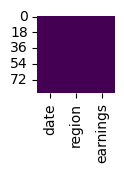

In [22]:
#visualizing missing values
plt.figure(figsize=(1,1))
sns.heatmap(table.isnull(), cbar=False,cmap='viridis')

In [23]:
#checking for the distribution of percent change of earnings
table['earnings'].pct_change().describe()


count    87.000000
mean     -0.000654
std       0.049311
min      -0.221031
25%      -0.003842
50%       0.001508
75%       0.011772
max       0.153167
Name: earnings, dtype: float64

In [ ]:
#saving the results
table.to_csv('C:/Users/ander/LightHouseNotes/final-project-tableau/Data/Cleaned data/weekly_earnings.csv', index=False)
table
